In [20]:
import pandas as pd
#import pandas as pd
import numpy as np
#import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.graph_objects as go
#from fbprophet import Prophet
import pycountry

In [21]:
df = pd.read_csv('covid_19_india.csv')
df.drop(columns=['Sno'],inplace=True)
#df_sort=df
#df_sort['Date']=pd.to_datetime(df['Date'].values)
#df_sort=df_sort.sort_values(["Date"])

In [23]:
df

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,30/01/20,Kerala,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,31/01/20,Kerala,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,01/02/20,Kerala,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,02/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,03/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,04/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,05/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,06/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,07/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,08/02/20,Kerala,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.describe()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,340.000000,340.000000,340.000000,340.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.902941,1.420588,0.738235,0.141176,NaN,NaN,NaN,NaN,NaN,NaN
std,12.459941,3.595661,1.769708,0.373232,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,87.000000,14.000000,11.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#df['Date'] =pd.to_datetime(df.Date)
df=df.groupby(['State/UnionTerritory',"Date"]).head()
States=np.unique(df['State/UnionTerritory'].values)
States

array(['Andhra Pradesh', 'Bihar', 'Chandigarh', 'Chattisgarh',
       'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Odisha',
       'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Telengana', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [26]:
top5aff_states=df.groupby(['State/UnionTerritory']).max().sort_values(['ConfirmedIndianNational'],ascending=False)[:5].index.values

In [27]:
dates=df[df['State/UnionTerritory'] == 'Kerala']['Date'].values

In [28]:
for state in States:
    df1=df[df['State/UnionTerritory'] == state]
    
    rec_date_idx=np.where(dates==df1['Date'].values[0])[0][0]
    if rec_date_idx >0:
        df2=pd.DataFrame()
        df2['Date']=dates[:rec_date_idx]
        df2['ConfirmedIndianNational'] =  np.zeros(rec_date_idx)
        df2['ConfirmedForeignNational'] = np.zeros(rec_date_idx)
        df2['Cured']=np.zeros(rec_date_idx)
        df2['Deaths']=np.zeros(rec_date_idx)
        df2['State/UnionTerritory']=state
        df2=df2.append(df1,ignore_index=True)
    else: df2=df1
    df2.to_csv('refined_data_all_dates/'+state+'.csv',index=False)

/home/srashti/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


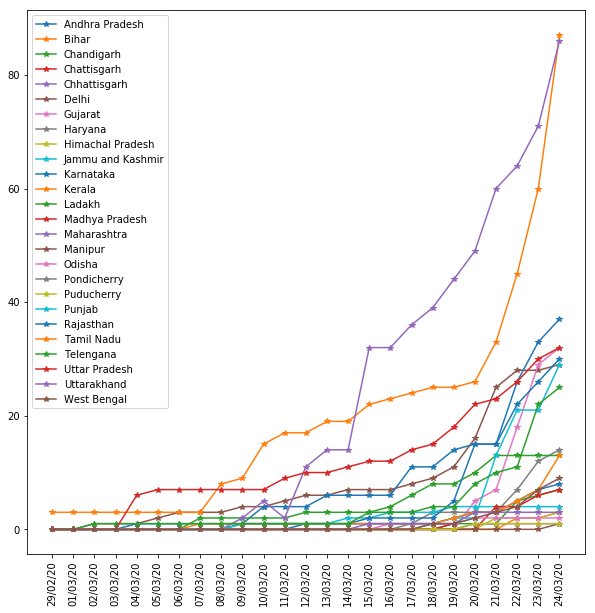

In [29]:
plt.figure(figsize=(10,10))

for state in States:
    df1=pd.read_csv('refined_data_all_dates/'+state+'.csv')
    df1=df1[30:]
    plt.plot(df1['Date'],df1['ConfirmedIndianNational'],"*-",label=state)
    #np.savetxt(state+'.txt',df1['ConfirmedIndianNational']+df1['ConfirmedForeignNational'])
plt.xticks(rotation=90)
plt.legend()
plt.savefig('indian_states.png')

In [30]:
top5aff_states

array(['Kerala', 'Maharashtra', 'Karnataka', 'Uttar Pradesh', 'Gujarat'],
      dtype=object)